## House Price Prediction - USA 

### About Dataset.
This dataset contains Real Estate listings in the US broken by State and zip code.

### Content. 

realtor-data.csv (2,226,382 entries):

    brokered by (categorically encoded agency/broker)
    status (Housing status - a. ready for sale or b. ready to build)
    price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)
    bed (# of beds)
    bath (# of bathrooms)
    acre_lot (Property / Land size in acres)
    street (categorically encoded street address)
    city (city name)
    state (state name)
    zip_code (postal code of the area)
    house_size (house area/size/living space in square feet)
    prev_sold_date (Previously sold date)

NB:

_brokered by and street addresses_ were categorically encoded due to data privacy policy.

_acre_lot_ means the total land area, and _house_size_ denotes the living space/building area

### Acknowledgment. 


Data was collected from - 
https://www.realtor.com/ - A real estate listing website operated by the News Corp subsidiary Move, Inc. and based in Santa Clara, California. It is the second most visited real estate listing website in the United States as of 2024, with over 100 million monthly active users.

## Step 1. Data Overview.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('train_set.csv')
df = data.copy()
df.head()

,brokered_by,status,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price
0,91206.0,sold,NaN,NaN,10.01,1879287.0,Temple,Texas,76501.0,NaN,2022-04-22,200000.0
1,16829.0,for_sale,4.0,3.0,0.21,1446993.0,San Francisco,California,94112.0,1530.0,NaN,1195000.0
2,20082.0,sold,2.0,2.0,30.81,1653941.0,Saint Petersburg,Florida,33716.0,975.0,2022-02-25,185000.0
3,73706.0,sold,2.0,1.0,1.58,136346.0,Friendship,Wisconsin,53934.0,700.0,2022-04-28,69000.0
4,45276.0,for_sale,4.0,4.0,0.12,1549817.0,West Jordan,Utah,84081.0,1888.0,2020-10-09,515000.0


In [3]:
data.shape

(1781105, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781105 entries, 0 to 1781104
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   bed             float64
 3   bath            float64
 4   acre_lot        float64
 5   street          float64
 6   city            object 
 7   state           object 
 8   zip_code        float64
 9   house_size      float64
 10  prev_sold_date  object 
 11  price           float64
dtypes: float64(8), object(4)
memory usage: 163.1+ MB


In [5]:
df.describe()

,brokered_by,bed,bath,acre_lot,street,zip_code,house_size,price
count,1.777457e+06,1.396118e+06,1.371738e+06,1.520724e+06,1.772396e+06,1.780862e+06,1.326633e+06,1.779868e+06
mean,5.293091e+04,3.275631e+00,2.496633e+00,1.494546e+01,1.012208e+06,5.219230e+04,2.877319e+03,5.249854e+05
std,3.064363e+04,1.598861e+00,1.722645e+00,7.479973e+02,5.837096e+05,2.895639e+04,9.034437e+05,2.299435e+06
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.010000e+02,4.000000e+00,0.000000e+00
25%,2.385900e+04,3.000000e+00,2.000000e+00,1.500000e-01,5.061788e+05,2.961700e+04,1.300000e+03,1.650000e+05
50%,5.288400e+04,3.000000e+00,2.000000e+00,2.600000e-01,1.012610e+06,4.842000e+04,1.760000e+03,3.250000e+05
75%,7.918000e+04,4.000000e+00,3.000000e+00,9.800000e-01,1.521023e+06,7.807000e+04,2.413000e+03,5.500000e+05
max,1.101420e+05,4.730000e+02,8.300000e+02,1.000000e+05,2.001356e+06,9.999900e+04,1.040400e+09,2.147484e+09


_brokered by_ and _street_ were encoded due to data privacy, therefore there is no reason to keep them and work with them.

In [6]:
#drop columns brokered by and street
df = df.drop(columns=['brokered_by','street'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781105 entries, 0 to 1781104
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   bed             float64
 2   bath            float64
 3   acre_lot        float64
 4   city            object 
 5   state           object 
 6   zip_code        float64
 7   house_size      float64
 8   prev_sold_date  object 
 9   price           float64
dtypes: float64(6), object(4)
memory usage: 135.9+ MB


Dropping the columns helped to reduce memory usage (from 163+ MB to 135+ MB).

In [7]:
# now we have 10 columns
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

## Step 2. Data Preprocessing 

### Initial Step

In [8]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,sold,NaN,NaN,10.01,Temple,Texas,76501.0,NaN,2022-04-22,200000.0
1,for_sale,4.0,3.0,0.21,San Francisco,California,94112.0,1530.0,NaN,1195000.0
2,sold,2.0,2.0,30.81,Saint Petersburg,Florida,33716.0,975.0,2022-02-25,185000.0
3,sold,2.0,1.0,1.58,Friendship,Wisconsin,53934.0,700.0,2022-04-28,69000.0
4,for_sale,4.0,4.0,0.12,West Jordan,Utah,84081.0,1888.0,2020-10-09,515000.0


In [9]:
# function to report the missing percentage and values
def missing_report(df):
    missing_values = df.isnull().sum() # count of missing values
    missing_percentage = (missing_values / len(df)) * 100 # percentage of missing values
    # display the results in a df
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage.round(2)})
    return missing_data.sort_values(by = "Percentage", ascending=False)
missing_report(df)

,Missing Values,Percentage
prev_sold_date,587360,32.98
house_size,454472,25.52
bath,409367,22.98
bed,384987,21.62
acre_lot,260381,14.62
price,1237,0.07
city,1116,0.06
zip_code,243,0.01
status,0,0.00
state,5,0.00


I decided to drop the minimal missing values, such as zip-code, state, city, and price. Specially the price, it's not reasonable to predict the price without knowing the price. 

In [10]:
### HANDLING MISSING VALUES ###

# Dropping rows with missing values in 'zip_code', 'state', 'city', and 'price'
df = df.dropna(subset=['zip_code', 'state', 'city', 'price']) 
missing_report(df)

,Missing Values,Percentage
prev_sold_date,585537,32.92
house_size,453056,25.47
bath,407815,22.93
bed,383703,21.57
acre_lot,259948,14.62
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


### Step 2.0 Prev_sold_date

_prev sold date_ has 32.92% of missing values. We cannot just drop it, we might lose useful infomation. 

There might be three possible reasons:
1. houses never sold before (if there's overlap between status(ready to built = new homes = never sold before)?)
2. first time listings
3. data not available. 


In [11]:
# 1. houses never sold before (if there's overlap between status(ready to built))
df['status'].value_counts()

status
for_sale          1109351
sold               649400
ready_to_build      19844
Name: count, dtype: int64

In [12]:
# Create a new binary feature 'has_prev_sale', if date exits then 1 else 0
df['has_prev_sale'] = np.where(df['prev_sold_date'].isnull(), 0, 1)

In [13]:
# Questions to explore:
# Are these missing values related to status? (e.g., "ready to build" = new homes = no previous sale?)
df['status'].value_counts()
df.groupby('status')['has_prev_sale'].value_counts(normalize=True)

status          has_prev_sale
for_sale        0                0.509931
                1                0.490069
ready_to_build  0                1.000000
sold            1                1.000000
Name: proportion, dtype: float64

50.9% and all 100% of missing values are from properties for sale and ready_to_build respectively. It makes sense. We can conclude that the missingness is depends on feature itself, since it never been sold before. Therefore, it's MNAR. The missing values carrie information, it's a new property, not a resale, etc. 

Rather than imputing a fake data in the _prev sold date_ I have created a new feature to check if the property is a new construction or have been sold before. And if the property was sold before, we will have a history of sale. 

### Step 2.1 bed, bath, house_size

Each of these attributes have more than 20% of missingness. 

Questions to explore:

Are missing house_size correlated with "ready to build" status?

Can you impute based on bed, bath, state, city?

What's the overlap with missing bed/bath?

Text(0.5, 0, 'Status')

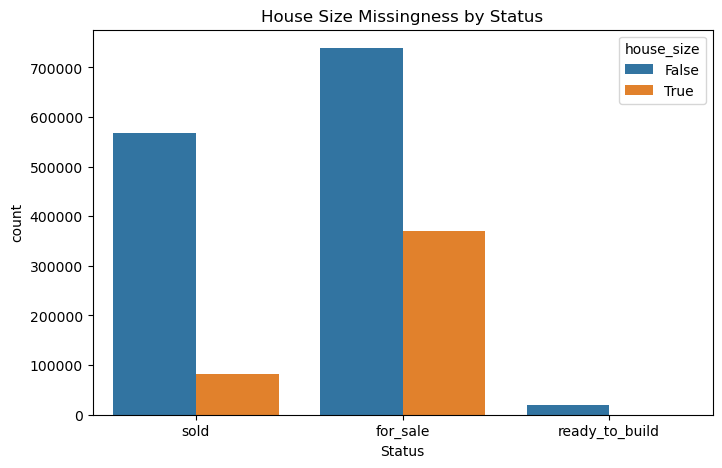

In [14]:
# visualization of overlap between house_size missingness and ready_to_build status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', hue=df['house_size'].isnull())
plt.title('House Size Missingness by Status')
plt.xlabel('Status')

In [15]:
# Overlap pie chart
bed_missing = df['bed'].isnull()
bath_missing = df['bath'].isnull()
house_size_missing = df['house_size'].isnull()

combinatinos = {
    'None missing': (~bed_missing & ~bath_missing & ~house_size_missing).sum(),
    'Only bed missing': (bed_missing & ~bath_missing & ~house_size_missing).sum(),
    'Only bath missing': (~bed_missing & bath_missing & ~house_size_missing).sum(),
    'Only house_size missing': (~bed_missing & ~bath_missing & house_size_missing).sum(),
    'Bed and bath missing': (bed_missing & bath_missing & ~house_size_missing).sum(),
    'Bed and house_size missing': (bed_missing & ~bath_missing & house_size_missing).sum(),
    'Bath and house_size missing': (~bed_missing & bath_missing & house_size_missing).sum(),
    'All missing': (bed_missing & bath_missing & house_size_missing).sum()
}   

colors_detailed = ['#2ecc71', '#f39c12', '#e67e22', '#3498db', 
                   '#e74c3c', '#c0392b', '#e74c3c', '#8e44ad']

fig1 = go.Figure(data=[go.Pie( # pie chart
    labels=list(combinatinos.keys()), # labels
    values=list(combinatinos.values()), # values
    marker=dict(colors=colors_detailed), # colors
    textinfo='label+percent', # show label and percent
    textposition='auto', # auto position text
    hole= 0.4, # donut chart
    pull = [0, 0, 0, 0, 0.05, 0.05, 0.05, 0.15] # pull out slices with missing values
)])
fig1.update_layout( # layout
    title={
        'text': '<b>Missing Value Pattern Distribution</b><br>' +
                '<sub>Interactive breakdown of bed, bath, house_size combinations</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    showlegend=True, # show legend
    legend=dict( # position legend outside the pie chart
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.05,
        font=dict(size=12)
    ),
    annotations=[dict( # center text
        text=f'Total: {len(df):,}<br>rows',
        x=0.5, y=0.5,
        font=dict(size=16, family='Arial Black'),
        showarrow=False
    )],
    width=900,
    height=600,
    template='plotly_white' # clean white background
)
fig1.show()
                    

In [16]:
# Correlation matrix of missing values
critical_cols = ['bed', 'bath', 'house_size', 'acre_lot', 'prev_sold_date'] # columns with significant missing values
missing_indicators = df[critical_cols].isnull().astype(int) # create binary indicators
corr_matrix = missing_indicators.corr() # correlation matrix

fig5 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdYlGn_r',
    zmid=0.5,
    text=corr_matrix.values,
    texttemplate='%{text:.2f}',
    textfont={"size": 14, "family": "Arial Black"},
    colorbar=dict(title="Correlation"),
    hovertemplate='<b>%{y} vs %{x}</b><br>' +
                  'Correlation: %{z:.3f}<br>' +
                  '<extra></extra>'
))

fig5.update_layout(
    title={
        'text': '<b>Missing Value Correlation Matrix</b><br>' +
                '<sub>Higher values = features tend to be missing together</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    xaxis_title='Features',
    yaxis_title='Features',
    width=800,
    height=700,
    template='plotly_white'
)

fig5.show()


AFTER DROPPING CORRELATION MAP TO DO

In [17]:
# missingness might be related to status, these properties are land, since they are not constructions we can drop them
for_sale = df['status'].isin(['for_sale', 'sold'])
# select rows where house_size and bed and bath are missing and status is 'for_sale' or 'sold'
land = df[for_sale & df['house_size'].isnull() & df['bed'].isnull() & df['bath'].isnull()]
for_sale_missing = df[for_sale & df['house_size'].isnull()]

#bed_missing & bath_missing & house_size_missing drop these rows
# df_imputed = df.drop(for_sale_missing.index)
# df_imputed.shape
for_sale_missing.head()
missing_report(for_sale_missing)

,Missing Values,Percentage
house_size,453047,100.00
bath,372416,82.20
bed,367391,81.09
prev_sold_date,275178,60.74
acre_lot,39533,8.73
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [18]:
# drop rows where house_size, bed, and bath are missing and status is 'for_sale' or 'sold'
# these properties are likely land-only listings, and i am predicting house not land
missing_report(df)

,Missing Values,Percentage
prev_sold_date,585537,32.92
house_size,453056,25.47
bath,407815,22.93
bed,383703,21.57
acre_lot,259948,14.62
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [19]:
"""
Overlap findings: "More than 90% of rows with missing house_size also have missing bed and bath"
Status correlation: "around 24% of missing values are from for sale or sold properties"
Decision made: "Based on the overlap, we decided to drop these rows, 
house_size is critical for our analysis and these properties are likely land-only listings"
"""
df = df.drop(land.index)
missing_report(df)

,Missing Values,Percentage
prev_sold_date,331835,23.49
acre_lot,249872,17.69
house_size,87325,6.18
bath,42084,2.98
bed,17972,1.27
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [20]:
# Correlation matrix of missing values
# critical_cols = ['bed', 'bath', 'house_size', 'acre_lot', 'prev_sold_date'] # columns with significant missing values
# missing_indicators = df[critical_cols].isnull().astype(int) # create binary indicators
corr_matrix_after = missing_indicators.corr() # correlation matrix

fig6 = go.Figure(data=go.Heatmap(
    z=corr_matrix_after.values,
    x=corr_matrix_after.columns,
    y=corr_matrix_after.index,
    colorscale='RdYlGn_r',
    zmid=0.5,
    text=corr_matrix_after.values,
    texttemplate='%{text:.2f}',
    textfont={"size": 14, "family": "Arial Black"},
    colorbar=dict(title="Correlation"),
    hovertemplate='<b>%{y} vs %{x}</b><br>' +
                  'Correlation: %{z:.3f}<br>' +
                  '<extra></extra>'
))

fig6.update_layout(
    title={
        'text': '<b>New Missing Value Correlation Matrix</b><br>' +
                '<sub>Higher values = features tend to be missing together</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    xaxis_title='Features',
    yaxis_title='Features',
    width=800,
    height=700,
    template='plotly_white'
)

fig6.show()


In [21]:
# distribution of status in missingness of bed and bath
df.groupby('status')[['bed', 'bath']].apply( lambda x: x.isna().sum())

,bed,bath
status,,
for_sale,10676,8612
ready_to_build,2,19844
sold,7294,13628


### Step2.2 acre lot - Why is it missing?

In [22]:
df.groupby('status')['acre_lot'].apply( lambda x: x.isna().sum())

status
for_sale          145726
ready_to_build     19844
sold               84302
Name: acre_lot, dtype: int64

Questions to explore:

1. Check: Does missingness correlate with city (urban vs rural)?
2. Impute with 0 for apartments/condos (or create "unknown" category)
3. OR use median by city/state
4. Consider: Create binary feature has_lot_info

In [23]:
# is it rural or urban? How we can check it? Why? If it's in urban place, it's likely to be an apartment or condo, so we can impute with 0.

# Compare properties WITH vs WITHOUT acre_lot
print('House size of Houses with lots', df[df['acre_lot'].notna()]['house_size'].mean())  # Houses with lots
print('House size of Houses without lots', df[df['acre_lot'].isna()]['house_size'].mean())   # Houses without lots
# Are they different? If yes → systematic!
# It means that the house' properties are different, it's likely is a different type of property as we mentioned above.

#Price
print('Price of Houses with lots', df[df['acre_lot'].notna()]['price'].mean())  # Houses with lots
print('Prices of Houses without lots', df[df['acre_lot'].isna()]['price'].mean())   # Houses without lots

House size of Houses with lots 2181.696842823443
House size of Houses without lots 6369.4579094942965
Price of Houses with lots 578231.9583746062
Prices of Houses without lots 596626.8113530127


In [24]:
# Look at distribution
missing_lot = df[df['acre_lot'].isna()]

print("House size statistics for missing acre_lot:")
print(missing_lot['house_size'].describe())

print("\nPercentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    val = missing_lot['house_size'].quantile(p/100)
    print(f"  {p}th: {val:.0f} sqft")

# Check for extreme outliers
extreme = missing_lot[missing_lot['house_size'] > 10000]
print(f"\nProperties >10,000 sqft: {len(extreme):,} ({len(extreme)/len(missing_lot)*100:.1f}%)")

House size statistics for missing acre_lot:
count    2.204060e+05
mean     6.369458e+03
std      2.216095e+06
min      4.000000e+00
25%      1.043000e+03
50%      1.443000e+03
75%      2.022000e+03
max      1.040400e+09
Name: house_size, dtype: float64

Percentiles:
  25th: 1043 sqft
  50th: 1443 sqft
  75th: 2022 sqft
  90th: 2706 sqft
  95th: 3176 sqft
  99th: 4439 sqft

Properties >10,000 sqft: 192 (0.1%)


In [25]:
# Remove physically impossible values
# Largest homes in USA are ~100,000 sqft
# Anything beyond that is likely an error
extreme_outliers = df[df['house_size'] > 50000]
df_clean = df[df['house_size'] <= 100000].copy()
print(f"Removed {len(df) - len(df_clean):,} extreme outliers")
# df.drop(extreme_outliers)
missing_report(df_clean)

Removed 87,410 extreme outliers


,Missing Values,Percentage
prev_sold_date,310307,23.41
acre_lot,220402,16.63
bath,35362,2.67
bed,16280,1.23
status,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
house_size,0,0.00
price,0,0.00


In [26]:
# After removing outliers
df_clean = df[df['house_size'] <= 50000]  # Reasonable upper bound

with_lot = df_clean[df_clean['acre_lot'].notna()]
without_lot = df_clean[df_clean['acre_lot'].isna()]

print("AFTER removing outliers:")
print(f"\nWITH acre_lot:")
print(f"  Mean: {with_lot['house_size'].mean():.0f} sqft")
print(f"  Median: {with_lot['house_size'].median():.0f} sqft")

print(f"\nWITHOUT acre_lot:")
print(f"  Mean: {without_lot['house_size'].mean():.0f} sqft")
print(f"  Median: {without_lot['house_size'].median():.0f} sqft")

AFTER removing outliers:

WITH acre_lot:
  Mean: 2112 sqft
  Median: 1817 sqft

WITHOUT acre_lot:
  Mean: 1640 sqft
  Median: 1443 sqft


c:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



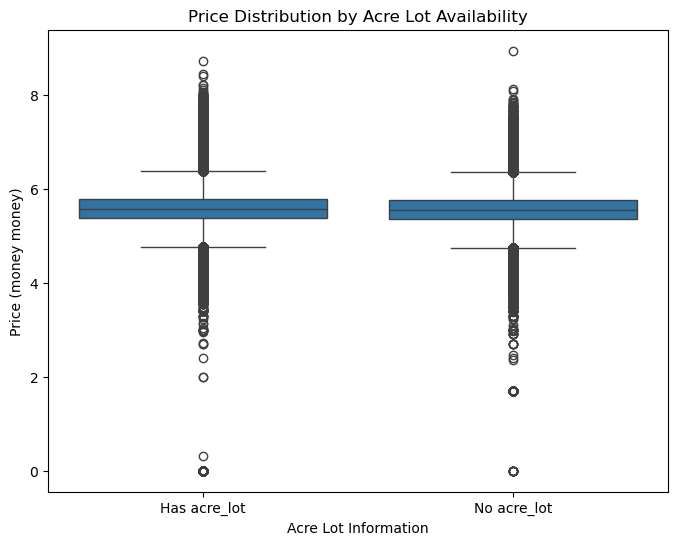

In [27]:

plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df['acre_lot'].isnull().map({True: 'No acre_lot', False: 'Has acre_lot'}),
    y=np.log10(df['price'])
)
plt.xlabel('Acre Lot Information')
plt.ylabel('Price (money money)')
plt.title('Price Distribution by Acre Lot Availability')
plt.show()

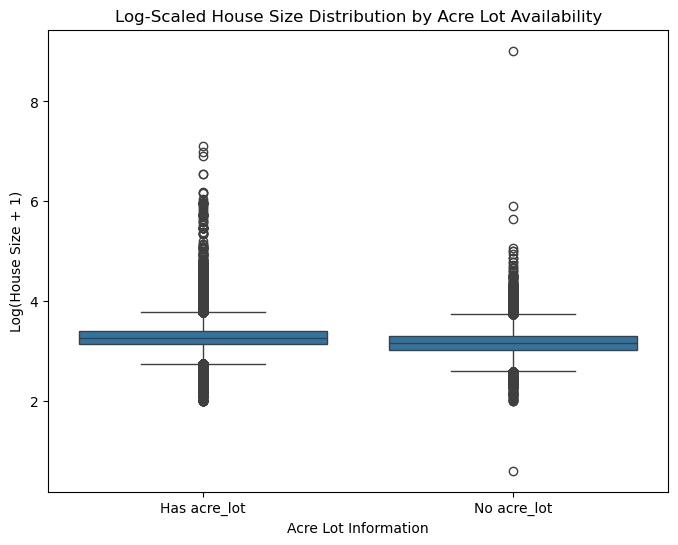

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df['acre_lot'].isnull().map({True: 'No acre_lot', False: 'Has acre_lot'}),
    y=np.log10(df['house_size'])
)
plt.xlabel('Acre Lot Information')
plt.ylabel('Log(House Size + 1)')
plt.title('Log-Scaled House Size Distribution by Acre Lot Availability')
plt.show()

Now we can confirm out theory about condos/apartments. These houses are likely to be an apartment or condos. 
Their sizes are different but price distribution are roughly the same, I assume they are located in urban area. 

In [29]:
#beofre imputing with zero, one more thing to check
# Of properties that HAVE acre_lot data, how many are 0?
has_lot = df[df['acre_lot'].notna()]
zero_count = (has_lot['acre_lot'] == 0).sum()
zero_pct = (zero_count / len(has_lot)) * 100

print(f"Existing acre_lot values that are 0: {zero_count:,} ({zero_pct:.2f}%)")
print(f"Min acre_lot (non-zero): {has_lot[has_lot['acre_lot'] > 0]['acre_lot'].min():.4f} acres")

Existing acre_lot values that are 0: 1,554 (0.13%)
Min acre_lot (non-zero): 0.0100 acres


In [30]:
df['state'].unique()

array(['California', 'Florida', 'Wisconsin', 'Utah', 'Pennsylvania',
       'Oklahoma', 'Texas', 'Kentucky', 'Maryland', 'Georgia', 'Oregon',
       'Minnesota', 'Colorado', 'Ohio', 'Mississippi', 'Virginia',
       'Illinois', 'Michigan', 'Rhode Island', 'Louisiana',
       'North Carolina', 'Tennessee', 'New Mexico', 'Idaho', 'New Jersey',
       'Arizona', 'Massachusetts', 'South Dakota', 'Alabama', 'Arkansas',
       'New York', 'Iowa', 'Nevada', 'Missouri', 'South Carolina',
       'Kansas', 'Washington', 'Indiana', 'Montana', 'Nebraska', 'Maine',
       'Delaware', 'West Virginia', 'Guam', 'Puerto Rico',
       'District of Columbia', 'Connecticut', 'Hawaii', 'Wyoming',
       'Alaska', 'Vermont', 'New Hampshire', 'North Dakota',
       'Virgin Islands'], dtype=object)

In [31]:
# Fill with median of small properties in same city

# For properties without acre_lot (likely condos)
# missing_mask = df['acre_lot'].isna()

# # Impute with median of small properties (<2000 sqft) in same city
# for city in df[missing_mask]['city'].unique():
#     city_mask = (df['city'] == city) & (df['house_size'] < 2000) & (df['acre_lot'].notna())
    
#     if city_mask.sum() > 5:  # If enough samples
#         city_small_median = df[city_mask]['acre_lot'].median()
#         df.loc[(df['city'] == city) & missing_mask, 'acre_lot'] = city_small_median

"""
it ran more than 10 minutes, i had to stop, i had about 17k unique cities... 
"""

# Fallback: state median for remaining
df['acre_lot'] = df.groupby('state')['acre_lot'].transform(lambda x: x.fillna(x.median()))

# Final fallback: 0
df['acre_lot'].fillna(0, inplace=True)

C:\Users\Администратор\AppData\Local\Temp\ipykernel_1896\190492300.py:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [32]:
missing_report(df)

,Missing Values,Percentage
prev_sold_date,331835,23.49
house_size,87325,6.18
bath,42084,2.98
bed,17972,1.27
status,0,0.00
acre_lot,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
price,0,0.00


In [33]:
missing_house_bed = df[df['house_size'].isna() & df['bed'].isna()]
print(f"house_size + bed missing: {len(missing_house_bed):,}")

missing_house_bath = df[df['house_size'].isna() & df['bath'].isna()]
print(f"house_size + bath missing: {len(missing_house_bath):,}")

house_size + bed missing: 1,660
house_size + bath missing: 6,694


Overlapping is really small here, therefore we can assume it's random errors. 

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Encode categoricals
le_state = LabelEncoder()
le_city = LabelEncoder()
df['state_encoded'] = le_state.fit_transform(df['state'].astype(str))
df['city_encoded'] = le_city.fit_transform(df['city'].astype(str))

def fast_regression_impute(df, target, predictors):
    """Fast regression imputation"""
    train = df[df[target].notna()]
    predict = df[df[target].isna()]
    
    if len(predict) == 0:
        return df[target]
    
    X_train = train[predictors].fillna(0)
    y_train = train[target]
    X_pred = predict[predictors].fillna(0)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_pred)
    
    result = df[target].copy()
    result.loc[predict.index] = predictions
    return result

# Impute in order 
print("1. Imputing bed...")
df['bed'] = fast_regression_impute(df, 'bed', 
    ['bath', 'house_size', 'price', 'state_encoded', 'city_encoded'])

print("2. Imputing bath...")
df['bath'] = fast_regression_impute(df, 'bath',
    ['bed', 'house_size', 'price', 'state_encoded', 'city_encoded'])

print("3. Imputing house_size...")
df['house_size'] = fast_regression_impute(df, 'house_size',
    ['bed', 'bath', 'acre_lot', 'price', 'state_encoded', 'city_encoded'])

# Post-process: Round and clip to reasonable ranges
df['bed'] = df['bed'].round().clip(0, 20).astype(int)
df['bath'] = df['bath'].round().clip(0, 20).astype(int)
df['house_size'] = df['house_size'].clip(100, 50000)

# Clean up
df = df.drop(['state_encoded', 'city_encoded'], axis=1)

print("\n✅ Imputation complete!")

1. Imputing bed...
2. Imputing bath...
3. Imputing house_size...

✅ Imputation complete!


In [35]:
missing_report(df)

,Missing Values,Percentage
prev_sold_date,331835,23.49
status,0,0.00
bed,0,0.00
bath,0,0.00
acre_lot,0,0.00
city,0,0.00
state,0,0.00
zip_code,0,0.00
house_size,0,0.00
price,0,0.00


## Step 3. Analysis
